In [20]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn import mixture

In [3]:
data = 'data/heart.csv'
df = pd.read_csv(data)
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

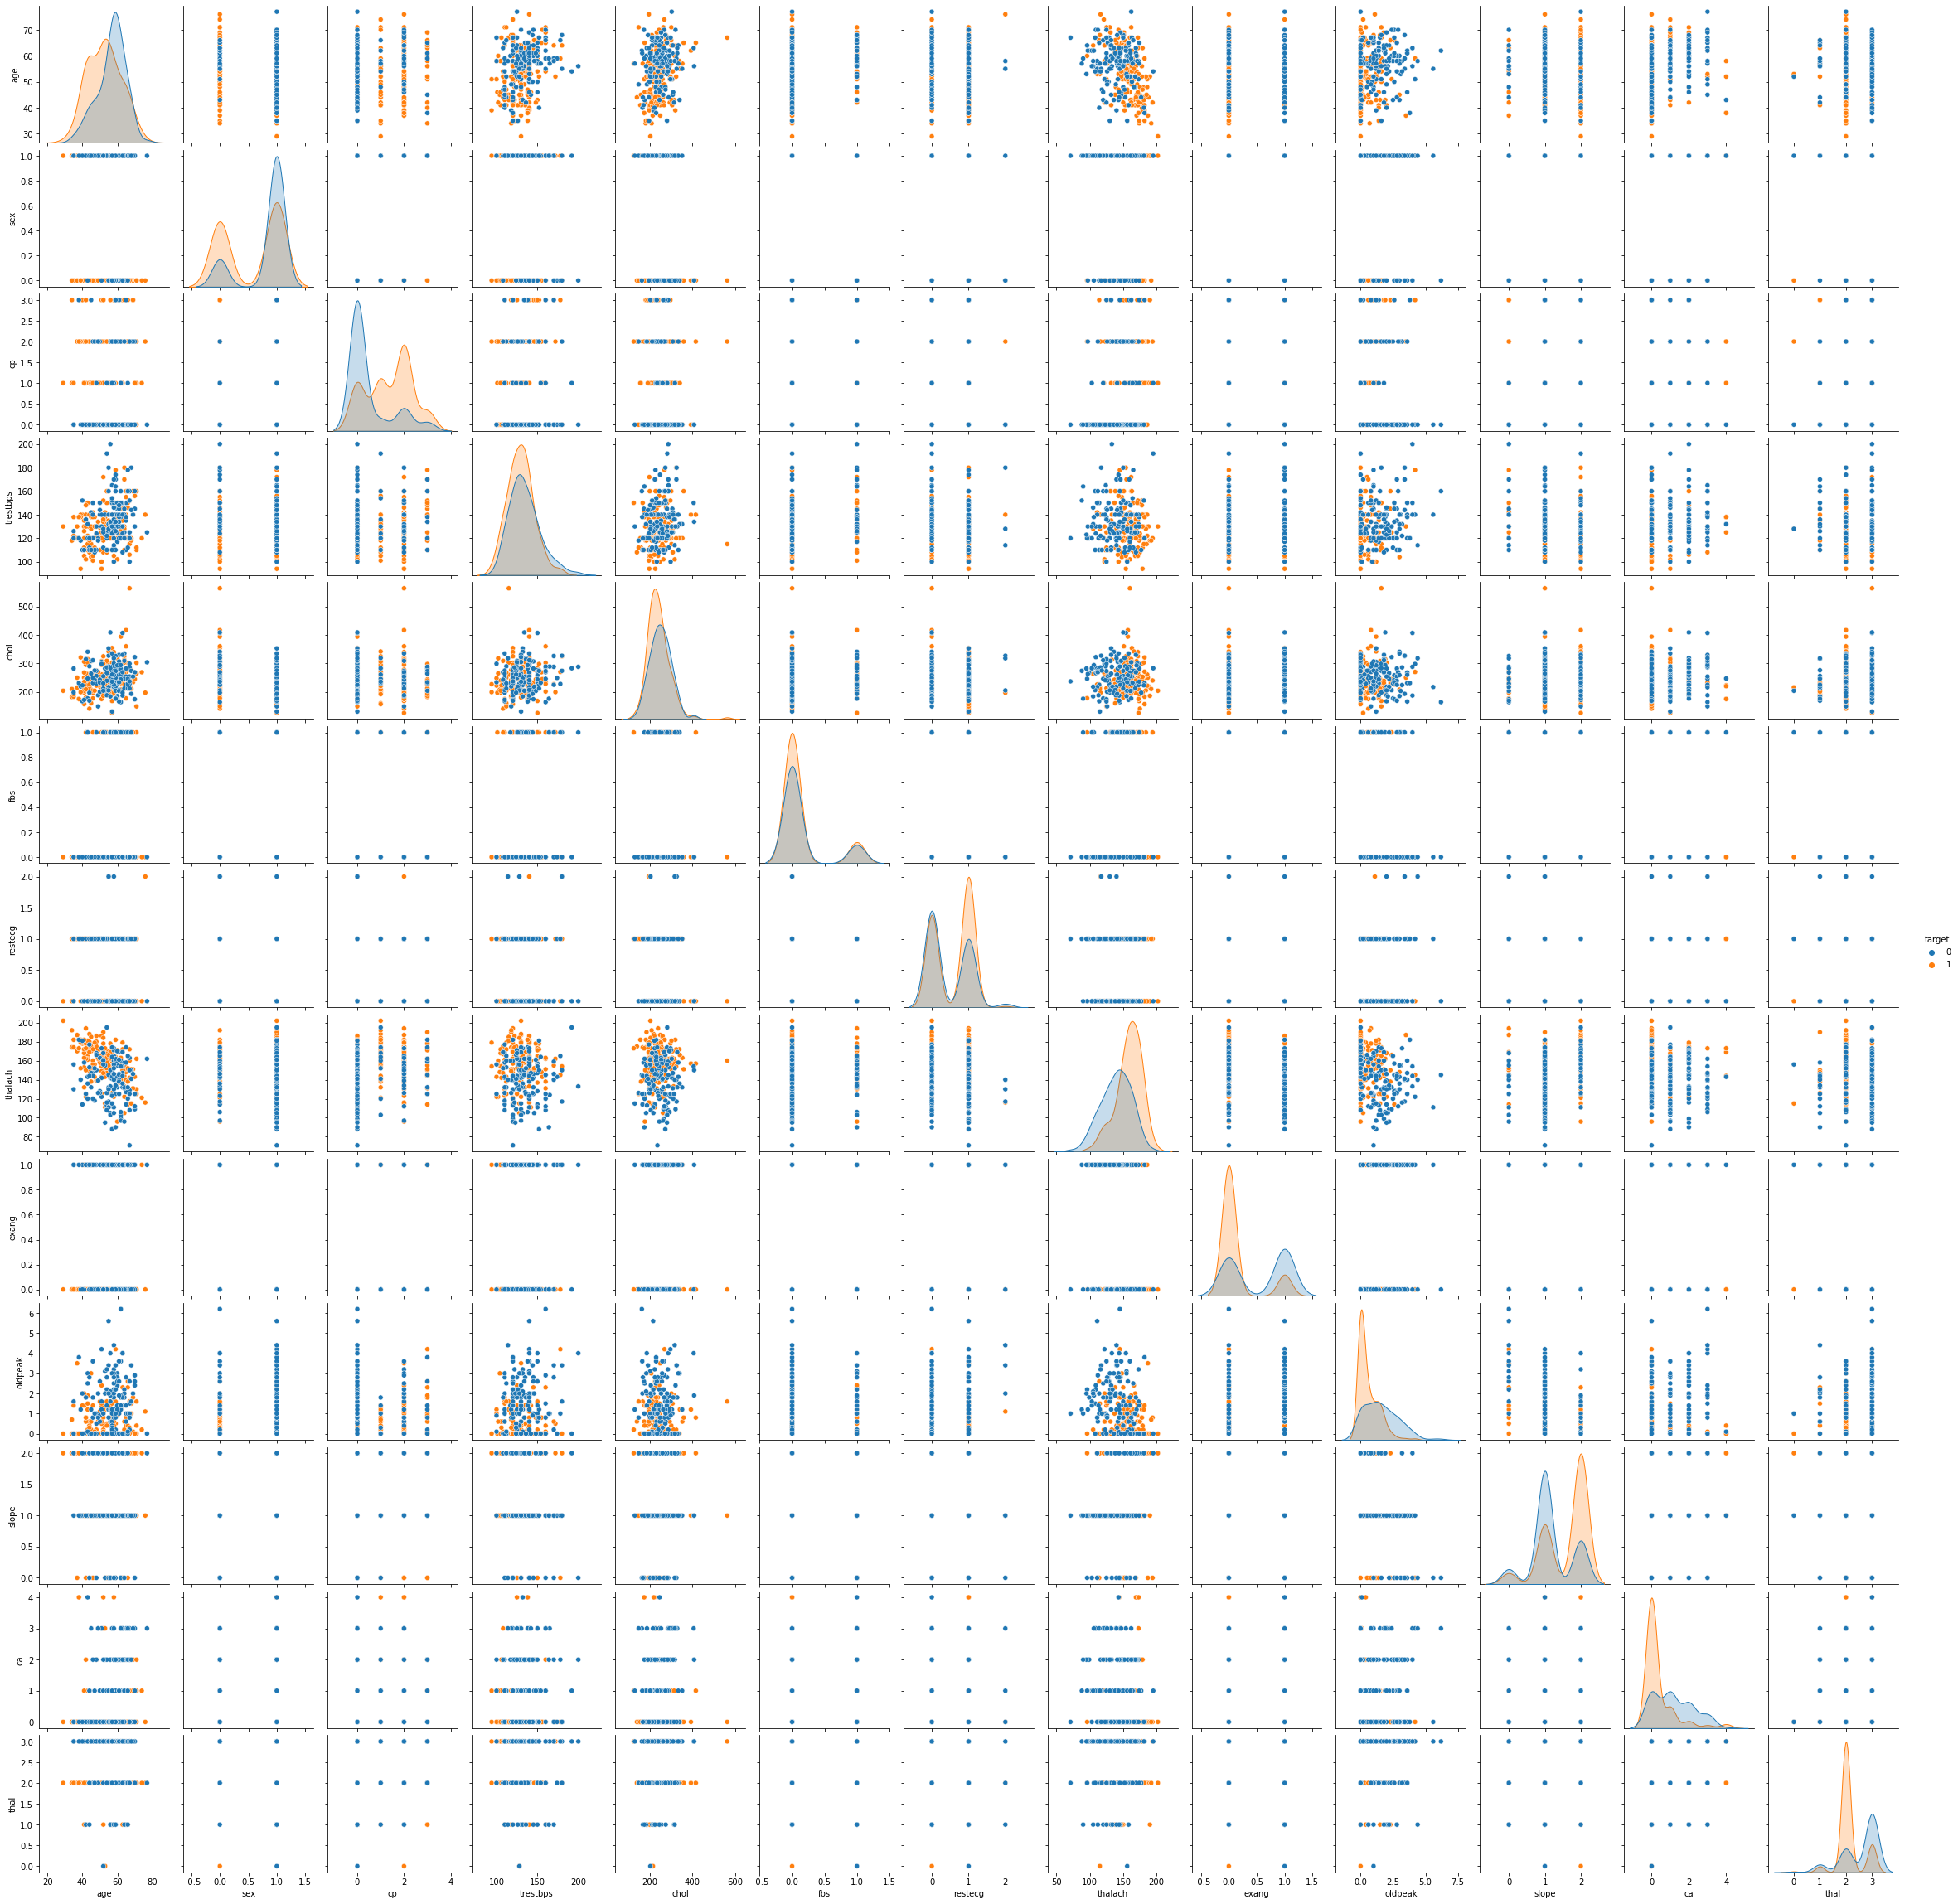

In [127]:
sns.pairplot(df, hue = 'target')
plt.show()

In [45]:
df=df.drop(['target'], axis = 1)

In [46]:
scaler = MinMaxScaler()
df[['age', 'sex', 'cp', 'trestbps', 'chol','fbs', 'restecg','thalach', 'exang', 'oldpeak', 'slope','ca','thal']] = scaler.fit_transform(df[['age', 'sex', 'cp', 'trestbps', 'chol','fbs', 'restecg','thalach', 'exang', 'oldpeak', 'slope','ca','thal']])

In [47]:
df

age  sex        cp  trestbps      chol  fbs  restecg   thalach  \
0    0.708333  1.0  1.000000  0.481132  0.244292  1.0      0.0  0.603053   
1    0.166667  1.0  0.666667  0.339623  0.283105  0.0      0.5  0.885496   
2    0.250000  0.0  0.333333  0.339623  0.178082  0.0      0.0  0.770992   
3    0.562500  1.0  0.333333  0.245283  0.251142  0.0      0.5  0.816794   
4    0.583333  0.0  0.000000  0.245283  0.520548  0.0      0.5  0.702290   
..        ...  ...       ...       ...       ...  ...      ...       ...   
298  0.583333  0.0  0.000000  0.433962  0.262557  0.0      0.5  0.396947   
299  0.333333  1.0  1.000000  0.150943  0.315068  0.0      0.5  0.465649   
300  0.812500  1.0  0.000000  0.471698  0.152968  1.0      0.5  0.534351   
301  0.583333  1.0  0.000000  0.339623  0.011416  0.0      0.5  0.335878   
302  0.583333  0.0  0.333333  0.339623  0.251142  0.0      0.0  0.786260   

     exang   oldpeak  slope    ca      thal  
0      0.0  0.370968    0.0  0.00  0.333333  
1      0.0  0.564516    0.0  0.00  0.666667  
2      0.0  0.225806    1.0  0.00  0.666667  
3      0.0  0.129032    1.0  0.00  0.666667  
4      1.0  0.096774    1.0  0.00  0.666667  
..     ...       ...    ...   ...       ...  
298    1.0  0.032258    0.5  0.00  1.000000  
299    0.0  0.193548    0.5  0.00  1.000000  
300    0.0  0.548387    0.5  0.50  1.000000  
301    1.0  0.193548    0.5  0.25  1.000000  
302    0.0  0.000000    0.5  0.25  0.666667  

[303 rows x 13 columns]

In [6]:
pca = PCA().fit(df)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 14, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 14, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

NameError: name 'PCA' is not defined

In [48]:
from pca import pca

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed on the [13] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[10]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


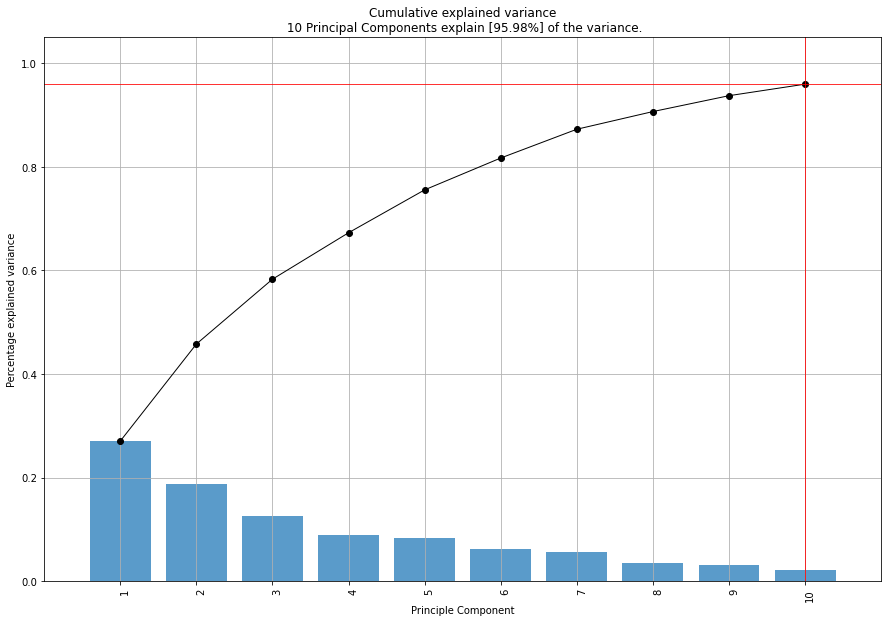

[pca] >Plot PC1 vs PC2 with loadings.


<Figure size 432x288 with 0 Axes>

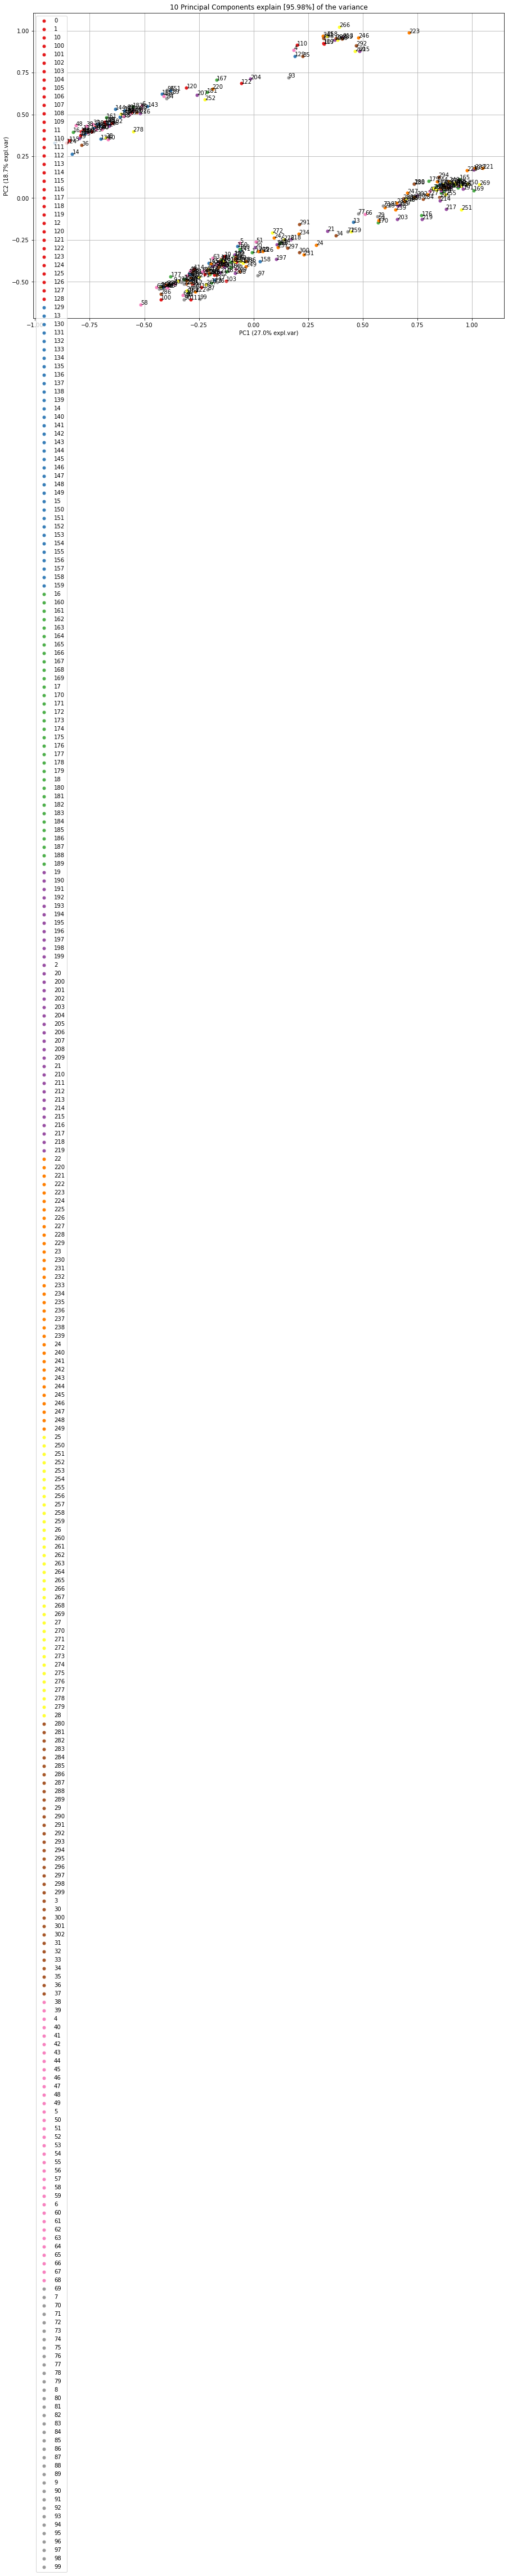

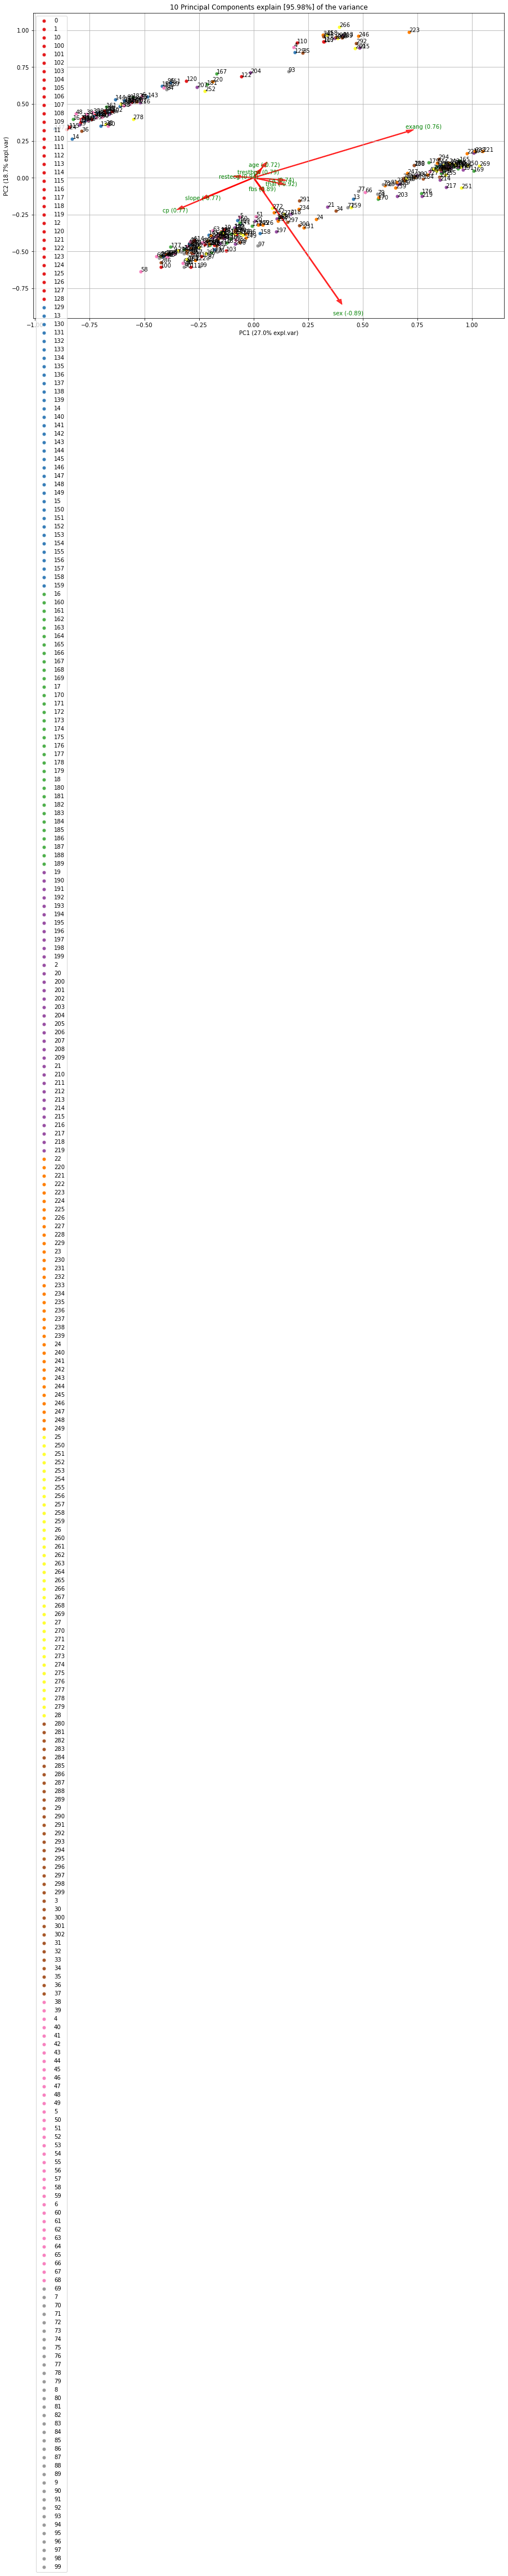

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


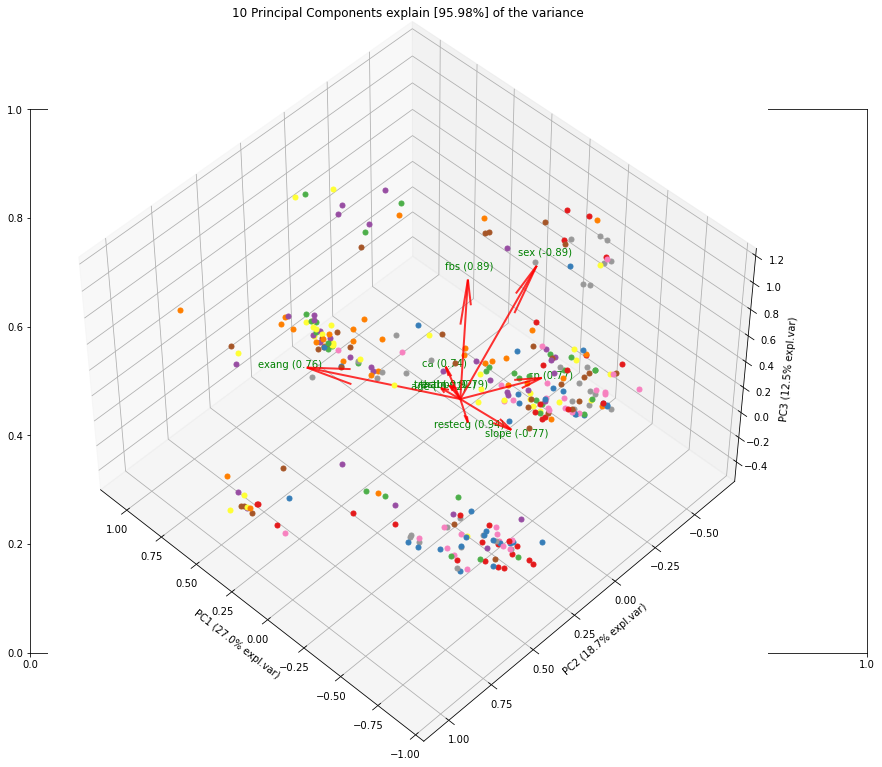

(<Figure size 1080x720 with 2 Axes>,
 <Axes3D:title={'center':'10 Principal Components explain [95.98%] of the variance'}, xlabel='PC1 (27.0% expl.var)', ylabel='PC2 (18.7% expl.var)'>)

In [49]:
# Or reduce the data towards 2 PCs
model = pca(n_components=10)

# Fit transform
results = model.fit_transform(df)

# Plot explained variance
fig, ax = model.plot()

# Scatter first 2 PCs
fig, ax = model.scatter()

# Make biplot with the number of features
fig, ax = model.biplot(n_feat=10)
model.biplot3d(n_feat=10, legend=False)

In [50]:
results

{'loadings':            age       sex        cp  trestbps      chol       fbs   restecg  \
 PC1   0.048114  0.419823 -0.346381  0.020800  0.002557  0.037647 -0.064966   
 PC2   0.083154 -0.890548 -0.214570  0.035236  0.062751 -0.073695  0.006820   
 PC3   0.138499 -0.081817  0.250903  0.133634  0.020950  0.890368 -0.139510   
 PC4   0.136378  0.039451  0.113130  0.060963  0.000380 -0.321574 -0.107363   
 PC5  -0.121552 -0.003314  0.765469  0.002218 -0.038090 -0.127839  0.112054   
 PC6  -0.096554  0.019783 -0.143603 -0.082291 -0.092174  0.174095  0.935503   
 PC7   0.281650 -0.046739  0.371701  0.103509  0.046515 -0.199781  0.231413   
 PC8  -0.003225  0.065320  0.007614 -0.170644 -0.118657 -0.050786  0.006578   
 PC9  -0.717911 -0.100788  0.043612 -0.331256 -0.073455  0.030375 -0.103515   
 PC10 -0.178956  0.029683 -0.095209  0.786036  0.044400 -0.059676  0.067020   
 
        thalach     exang   oldpeak     slope        ca      thal  
 PC1  -0.150068  0.755026  0.146038 -0.224882  0.

In [51]:
print(model.results['explained_var'])

[0.27038127 0.45781789 0.58307259 0.67276865 0.75561302 0.81713629
 0.87270243 0.90684897 0.93751905 0.95980714]


In [52]:
print(model.results['variance_ratio'])

[0.27038127 0.18743662 0.1252547  0.08969606 0.08284437 0.06152327
 0.05556614 0.03414654 0.03067008 0.02228809]


In [53]:
print(model.results['topfeat'])

      PC   feature   loading  type
0    PC1     exang  0.755026  best
1    PC2       sex -0.890548  best
2    PC3       fbs  0.890368  best
3    PC4     slope -0.767033  best
4    PC5        cp  0.765469  best
5    PC6   restecg  0.935503  best
6    PC7        ca  0.739621  best
7    PC8      thal -0.924367  best
8    PC9       age -0.717911  best
9   PC10  trestbps  0.786036  best
10   PC8      chol -0.118657  weak
11  PC10   thalach  0.454526  weak
12   PC4   oldpeak  0.338856  weak


In [54]:
print(model.results['loadings'])

           age       sex        cp  trestbps      chol       fbs   restecg  \
PC1   0.048114  0.419823 -0.346381  0.020800  0.002557  0.037647 -0.064966   
PC2   0.083154 -0.890548 -0.214570  0.035236  0.062751 -0.073695  0.006820   
PC3   0.138499 -0.081817  0.250903  0.133634  0.020950  0.890368 -0.139510   
PC4   0.136378  0.039451  0.113130  0.060963  0.000380 -0.321574 -0.107363   
PC5  -0.121552 -0.003314  0.765469  0.002218 -0.038090 -0.127839  0.112054   
PC6  -0.096554  0.019783 -0.143603 -0.082291 -0.092174  0.174095  0.935503   
PC7   0.281650 -0.046739  0.371701  0.103509  0.046515 -0.199781  0.231413   
PC8  -0.003225  0.065320  0.007614 -0.170644 -0.118657 -0.050786  0.006578   
PC9  -0.717911 -0.100788  0.043612 -0.331256 -0.073455  0.030375 -0.103515   
PC10 -0.178956  0.029683 -0.095209  0.786036  0.044400 -0.059676  0.067020   

       thalach     exang   oldpeak     slope        ca      thal  
PC1  -0.150068  0.755026  0.146038 -0.224882  0.124711  0.123855  
PC2  -0

In [55]:
model.results['loadings'].shape

(10, 13)

In [56]:
dataset=model.results['PC']

In [57]:
dataset

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0   -0.178343 -0.458325  1.137222  0.542799  0.403890 -0.047364 -0.353014   
1   -0.134753 -0.385192 -0.004799  0.731135  0.395721  0.362368 -0.280582   
2   -0.660055  0.430046 -0.166570 -0.144475 -0.046629 -0.280333 -0.195267   
3   -0.280461 -0.438956 -0.295501 -0.161943 -0.033140  0.169766 -0.055323   
4    0.184367  0.885580 -0.304444 -0.554487  0.123544  0.106376  0.000074   
..        ...       ...       ...       ...       ...       ...       ...   
298  0.377758  0.953908 -0.178574 -0.112171  0.153002  0.222958 -0.052035   
299 -0.308363 -0.511692 -0.053040  0.358473  0.520193  0.216787  0.074453   
300  0.208842 -0.324607  0.796394  0.167121 -0.618776  0.470083  0.052688   
301  0.858873  0.054391 -0.223660  0.010517  0.055888  0.273160  0.081191   
302 -0.535479  0.513335  0.010043  0.230208 -0.133756 -0.255065 -0.067254   

          PC8       PC9      PC10  
0    0.333320 -0.134378  0.064757  
1    0.038463  0.350691  0.276839  
2   -0.040620  0.211690  0.116183  
3    0.037314 -0.124792  0.048523  
4    0.014438 -0.066833  0.018875  
..        ...       ...       ...  
298 -0.210172 -0.092761 -0.092607  
299 -0.177449  0.099159 -0.281293  
300 -0.198209 -0.117162  0.053126  
301 -0.046317 -0.061238 -0.125885  
302  0.064134  0.156866  0.002793  

[303 rows x 10 columns]

C:\Users\707609\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


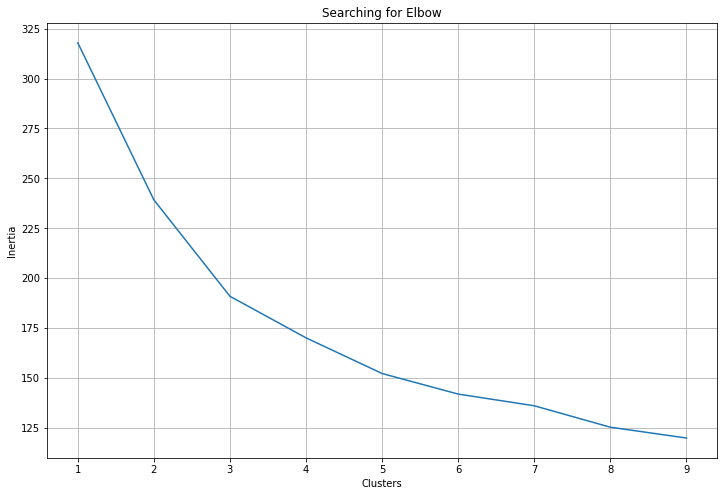

In [84]:
from sklearn.cluster import KMeans

clusters = []

for i in range(1, 10):
    km = KMeans(n_clusters=i).fit(dataset)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 10)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# Annotate arrow


plt.grid()
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.43744872484343617
For n_clusters = 3 The average silhouette_score is : 0.4204126357881636
For n_clusters = 4 The average silhouette_score is : 0.38799343615990983
For n_clusters = 5 The average silhouette_score is : 0.35421161523684774


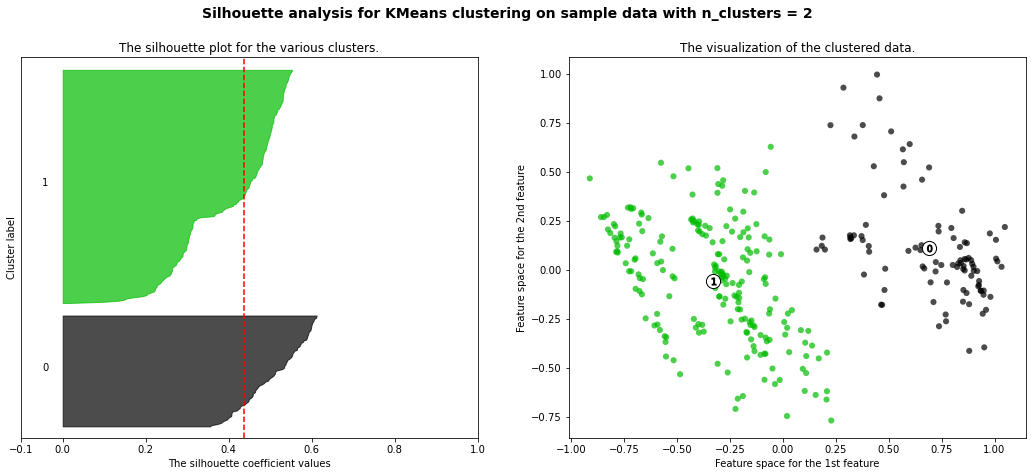

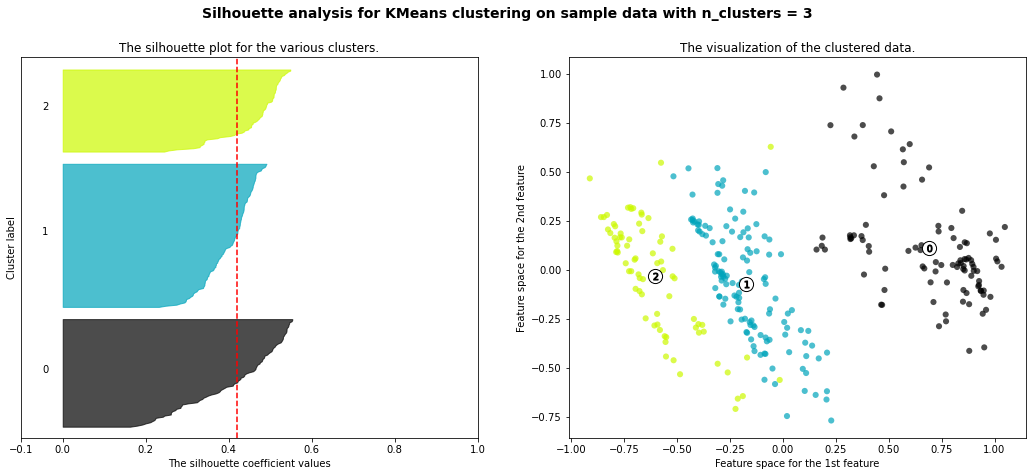

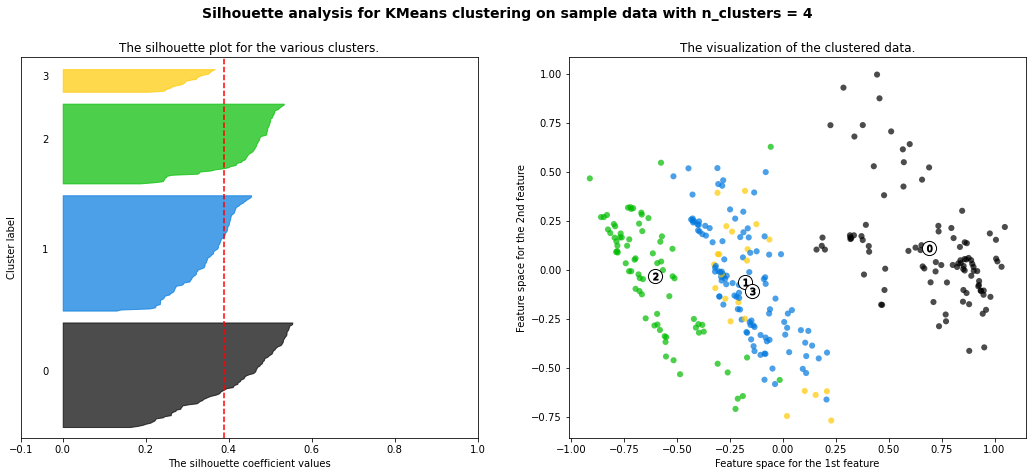

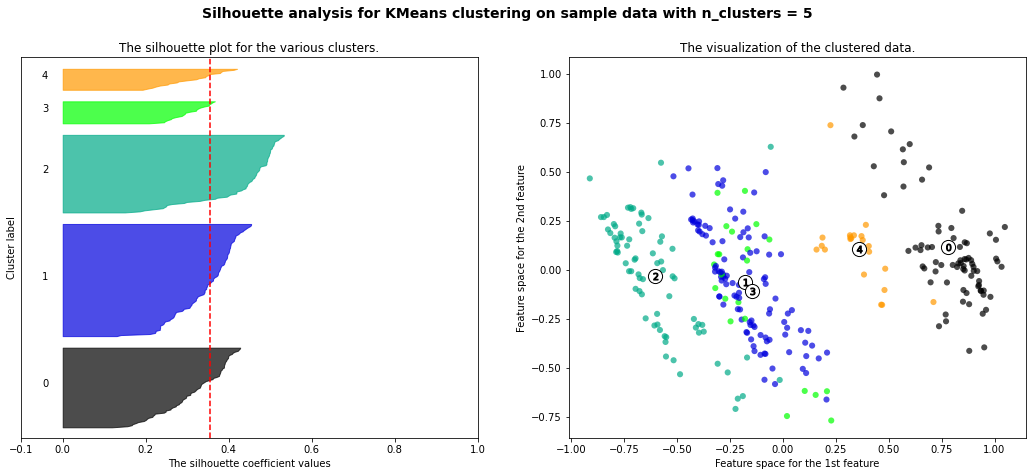

In [93]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.


range_n_clusters = [2, 3, 4, 5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(dataset) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(dataset)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(dataset, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(dataset, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        dataset['PC1'], dataset['PC5'], marker=".", s=150, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 4],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[4], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [94]:
km = KMeans(n_clusters= 2, random_state=10, max_iter = 600, tol = 1)

In [95]:
model = km.fit(dataset)

In [96]:
cluster_labels = model.labels_
cluster_labels

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,

In [97]:
dataset['labels'] = cluster_labels
dataset

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0   -0.178343 -0.458325  1.137222  0.542799  0.403890 -0.047364 -0.353014   
1   -0.134753 -0.385192 -0.004799  0.731135  0.395721  0.362368 -0.280582   
2   -0.660055  0.430046 -0.166570 -0.144475 -0.046629 -0.280333 -0.195267   
3   -0.280461 -0.438956 -0.295501 -0.161943 -0.033140  0.169766 -0.055323   
4    0.184367  0.885580 -0.304444 -0.554487  0.123544  0.106376  0.000074   
..        ...       ...       ...       ...       ...       ...       ...   
298  0.377758  0.953908 -0.178574 -0.112171  0.153002  0.222958 -0.052035   
299 -0.308363 -0.511692 -0.053040  0.358473  0.520193  0.216787  0.074453   
300  0.208842 -0.324607  0.796394  0.167121 -0.618776  0.470083  0.052688   
301  0.858873  0.054391 -0.223660  0.010517  0.055888  0.273160  0.081191   
302 -0.535479  0.513335  0.010043  0.230208 -0.133756 -0.255065 -0.067254   

          PC8       PC9      PC10  labels  
0    0.333320 -0.134378  0.064757       1  
1    0.038463  0.350691  0.276839       1  
2   -0.040620  0.211690  0.116183       1  
3    0.037314 -0.124792  0.048523       1  
4    0.014438 -0.066833  0.018875       0  
..        ...       ...       ...     ...  
298 -0.210172 -0.092761 -0.092607       0  
299 -0.177449  0.099159 -0.281293       1  
300 -0.198209 -0.117162  0.053126       1  
301 -0.046317 -0.061238 -0.125885       0  
302  0.064134  0.156866  0.002793       1  

[303 rows x 11 columns]

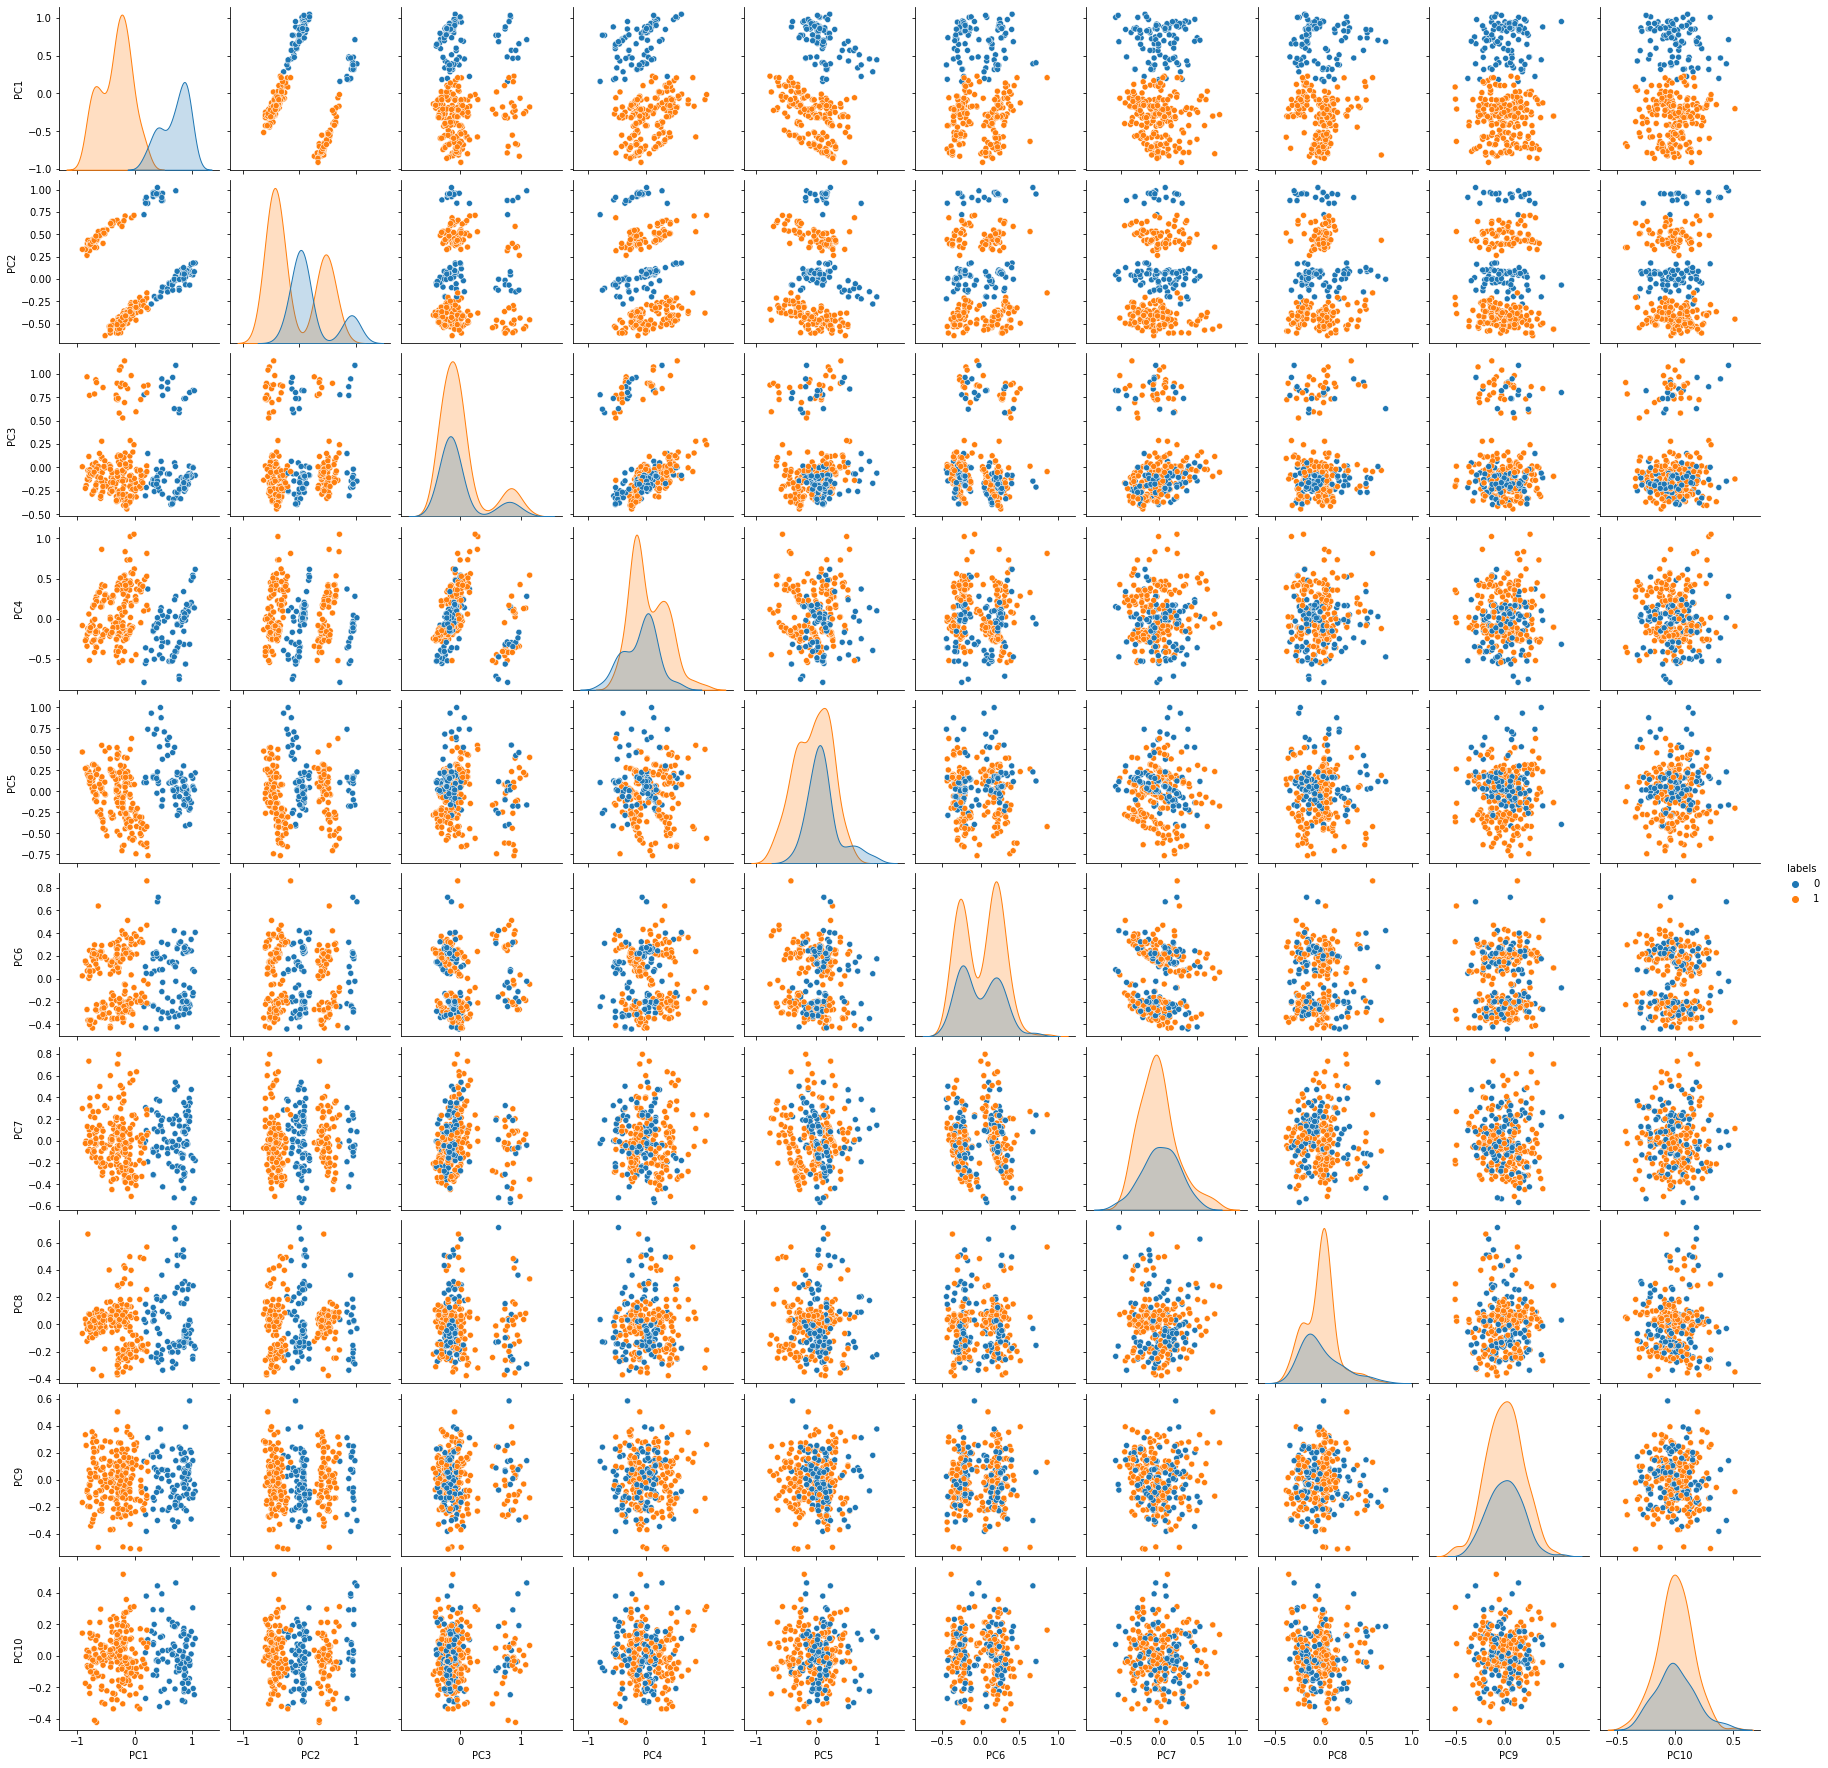

In [98]:
sns.pairplot(dataset, hue = 'labels')
plt.show()

In [99]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from sklearn.model_selection import train_test_split
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix
from keras import layers
from keras import models
from keras import utils
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Activation
from keras.regularizers import l2
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import SGD
from keras import datasets
from keras.utils import np_utils
from keras.callbacks import LearningRateScheduler
from keras.callbacks import History
from keras import backend as K
from keras import losses
from sklearn.utils import shuffle

In [112]:
y = dataset['labels']
X = dataset.drop(columns=['labels'])

print(X.shape)
print(y.shape)

(303, 10)
(303,)


In [118]:
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, stratify=y, random_state = 0)
print(x_train.shape)
print(x_test.shape)

(212, 10)
(91, 10)


In [119]:
from keras.constraints import maxnorm
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(8, input_dim=x_train.shape[1], activation='relu', kernel_initializer='uniform', kernel_constraint=maxnorm(2)))
model.add(Dropout(0.1))
model.add(Dense(8, activation='relu', kernel_initializer='uniform', kernel_constraint=maxnorm(2)))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))
# Compile model
optimizer = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [120]:
model_tuned = model.fit(x_train, y_train,
                    batch_size=10,
                    epochs=100,
                    verbose=1,
                    validation_split=0.2)

Epoch 1/100
17/17 [==============================] - 1s 9ms/step - loss: 0.6900 - accuracy: 0.6686 - val_loss: 0.6870 - val_accuracy: 0.6512
Epoch 2/100
17/17 [==============================] - 0s 3ms/step - loss: 0.6826 - accuracy: 0.6805 - val_loss: 0.6782 - val_accuracy: 0.6512
Epoch 3/100
17/17 [==============================] - 0s 3ms/step - loss: 0.6711 - accuracy: 0.6805 - val_loss: 0.6647 - val_accuracy: 0.6512
Epoch 4/100
17/17 [==============================] - 0s 3ms/step - loss: 0.6524 - accuracy: 0.6805 - val_loss: 0.6423 - val_accuracy: 0.6512
Epoch 5/100
17/17 [==============================] - 0s 3ms/step - loss: 0.6223 - accuracy: 0.6805 - val_loss: 0.6101 - val_accuracy: 0.6512
Epoch 6/100
17/17 [==============================] - 0s 3ms/step - loss: 0.5900 - accuracy: 0.6805 - val_loss: 0.5695 - val_accuracy: 0.6512
Epoch 7/100
17/17 [==============================] - 0s 3ms/step - loss: 0.5383 - accuracy: 0.6864 - val_loss: 0.5200 - val_accuracy: 0.6512
Epoch 8/100
1

In [121]:
score = model.evaluate(x_test, y_test, verbose=0)
score

[0.0053007276728749275, 1.0]

In [122]:
print('Test accuracy:', score[1])
print('Test loss:', score[0])

Test accuracy: 1.0
Test loss: 0.0053007276728749275


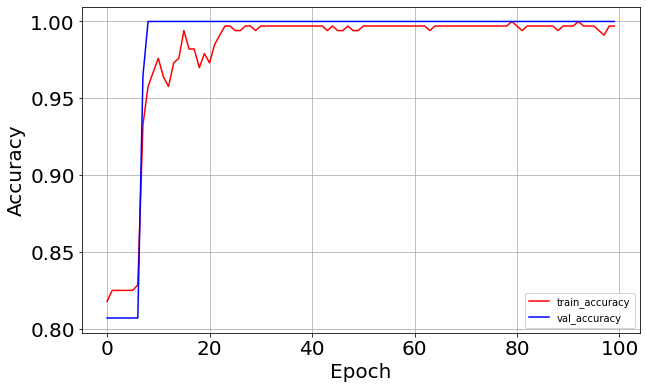

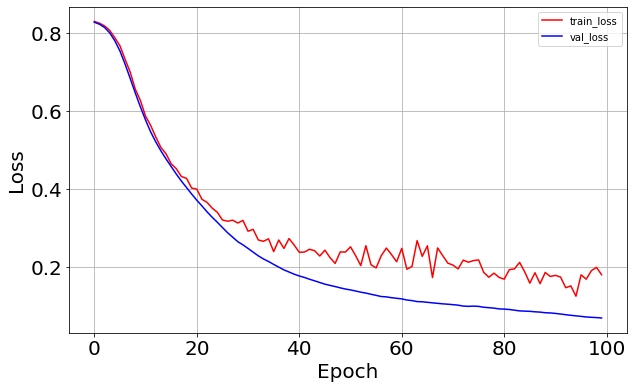

In [123]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(model_tuned.history['accuracy']), 'r', label='train_accuracy')
ax.plot(np.sqrt(model_tuned.history['val_accuracy']), 'b' ,label='val_accuracy')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Accuracy', fontsize=20)
ax.legend()
plt.grid()
ax.tick_params(labelsize=20)

fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(model_tuned.history['loss']), 'r', label='train_loss')
ax.plot(np.sqrt(model_tuned.history['val_loss']), 'b' ,label='val_loss')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
plt.grid()
ax.tick_params(labelsize=20)

In [58]:
dataset

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0   -0.178343 -0.458325  1.137222  0.542799  0.403890 -0.047364 -0.353014   
1   -0.134753 -0.385192 -0.004799  0.731135  0.395721  0.362368 -0.280582   
2   -0.660055  0.430046 -0.166570 -0.144475 -0.046629 -0.280333 -0.195267   
3   -0.280461 -0.438956 -0.295501 -0.161943 -0.033140  0.169766 -0.055323   
4    0.184367  0.885580 -0.304444 -0.554487  0.123544  0.106376  0.000074   
..        ...       ...       ...       ...       ...       ...       ...   
298  0.377758  0.953908 -0.178574 -0.112171  0.153002  0.222958 -0.052035   
299 -0.308363 -0.511692 -0.053040  0.358473  0.520193  0.216787  0.074453   
300  0.208842 -0.324607  0.796394  0.167121 -0.618776  0.470083  0.052688   
301  0.858873  0.054391 -0.223660  0.010517  0.055888  0.273160  0.081191   
302 -0.535479  0.513335  0.010043  0.230208 -0.133756 -0.255065 -0.067254   

          PC8       PC9      PC10  
0    0.333320 -0.134378  0.064757  
1    0.038463  0.350691  0.276839  
2   -0.040620  0.211690  0.116183  
3    0.037314 -0.124792  0.048523  
4    0.014438 -0.066833  0.018875  
..        ...       ...       ...  
298 -0.210172 -0.092761 -0.092607  
299 -0.177449  0.099159 -0.281293  
300 -0.198209 -0.117162  0.053126  
301 -0.046317 -0.061238 -0.125885  
302  0.064134  0.156866  0.002793  

[303 rows x 10 columns]

For n_components = 2 The average silhouette_score is : 0.23296089227500238
For n_components = 3 The average silhouette_score is : 0.2783389903459051
For n_components = 4 The average silhouette_score is : 0.21200846216739958
For n_components = 5 The average silhouette_score is : 0.19408797258522928


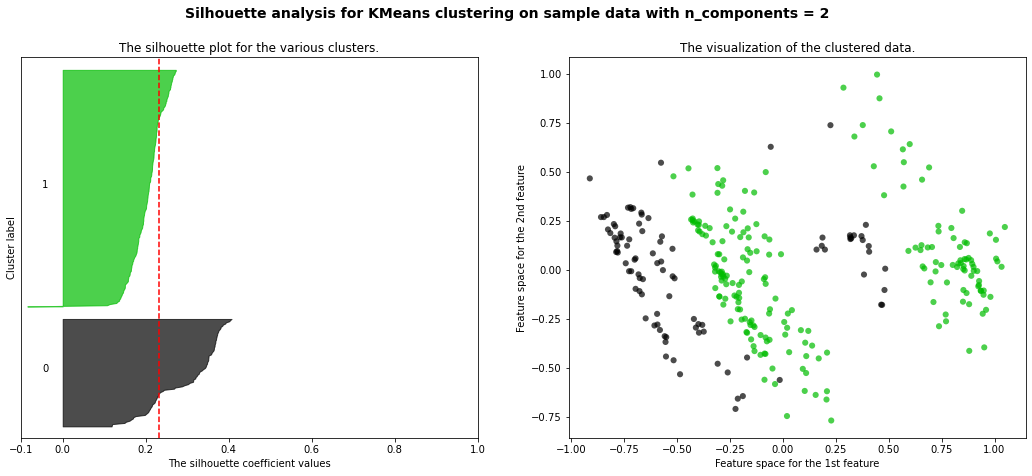

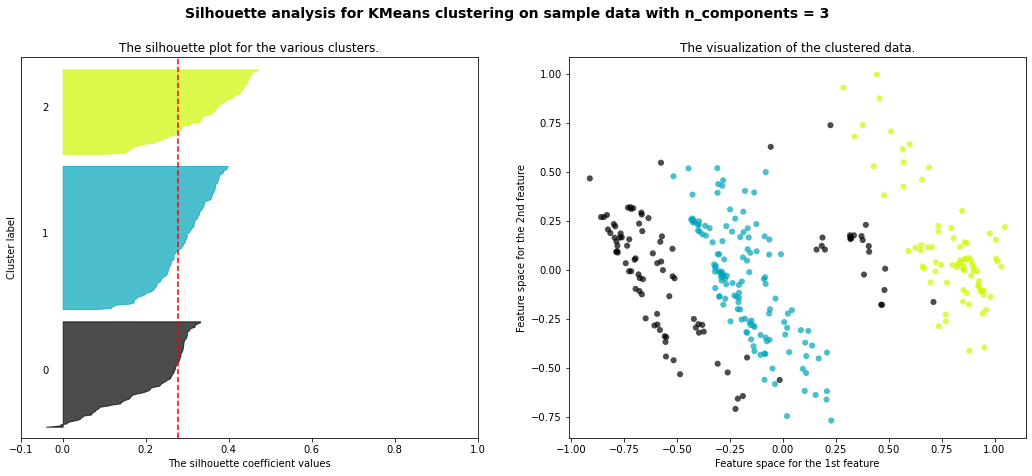

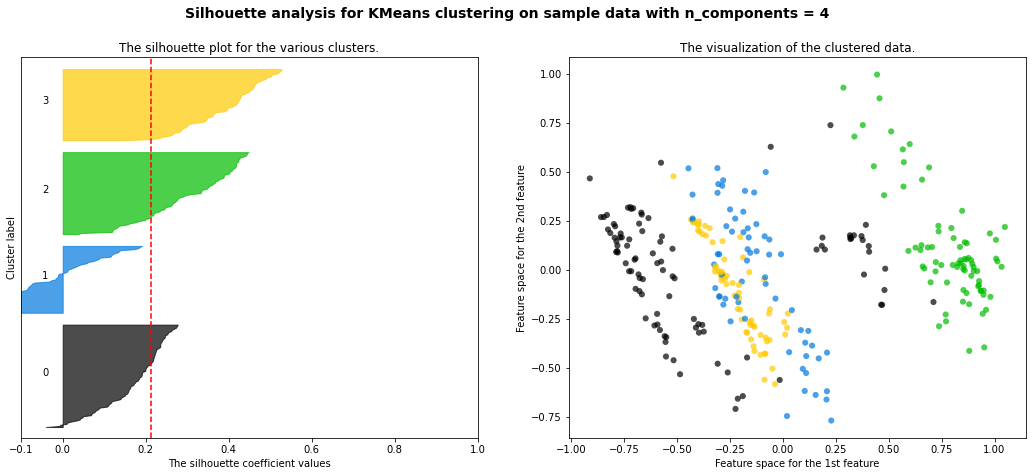

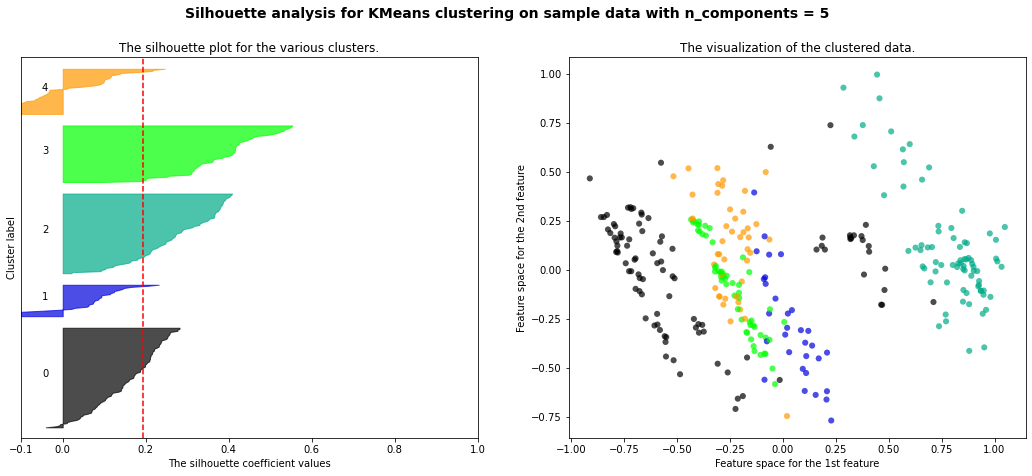

In [63]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm


range_n_components = [2, 3, 4, 5]

for n_components in range_n_components:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(dataset) + (n_components + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    gmm = mixture.GaussianMixture(
    n_components=n_components, covariance_type='spherical', max_iter = 600, tol = 1, random_state = 4
        )
    cluster_labels = gmm.fit_predict(dataset)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(dataset, cluster_labels)
    print(
        "For n_components =",
        n_components,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(dataset, cluster_labels)

    y_lower = 10
    for i in range(n_components):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_components)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_components)
    ax2.scatter(
        dataset['PC1'], dataset['PC5'], marker=".", s=150, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )



    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_components = %d"
        % n_components,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [64]:
    gmm = mixture.GaussianMixture(
    n_components=3, covariance_type='spherical', max_iter = 600, tol = 0.01, random_state = 4
        )

In [65]:
model = gmm.fit(dataset)

In [66]:
labels = gmm.predict(dataset)
labels

array([1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 2, 0, 0, 0, 0, 1, 0, 1, 2,
       1, 2, 2, 0, 1, 1, 0, 1, 0, 1, 1, 1, 2, 0, 0, 1, 0, 0, 0, 1, 2, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       2, 0, 1, 0, 1, 2, 1, 2, 0, 0, 1, 2, 1, 2, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 2, 1, 0, 0, 2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 2, 2, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2,
       2, 1, 2, 2, 2, 0, 0, 1, 1, 1, 2, 2, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1,
       2, 1, 1, 2, 2, 2, 0, 2, 2, 0, 1, 2, 1, 2, 1, 0, 2, 0, 0, 2, 1, 2,
       0, 2, 1, 0, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 0,
       1, 2, 2, 1, 0, 2, 1, 1, 2, 2, 0, 2, 1, 2, 2, 2, 0, 2, 0, 1, 2, 0,
       2, 2, 0, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 1, 2, 2,
       1, 1, 2, 0, 1, 1, 0, 1, 2, 2, 0, 1, 0, 1, 1,

In [67]:
dataset['labels'] = labels
dataset

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0   -0.178343 -0.458325  1.137222  0.542799  0.403890 -0.047364 -0.353014   
1   -0.134753 -0.385192 -0.004799  0.731135  0.395721  0.362368 -0.280582   
2   -0.660055  0.430046 -0.166570 -0.144475 -0.046629 -0.280333 -0.195267   
3   -0.280461 -0.438956 -0.295501 -0.161943 -0.033140  0.169766 -0.055323   
4    0.184367  0.885580 -0.304444 -0.554487  0.123544  0.106376  0.000074   
..        ...       ...       ...       ...       ...       ...       ...   
298  0.377758  0.953908 -0.178574 -0.112171  0.153002  0.222958 -0.052035   
299 -0.308363 -0.511692 -0.053040  0.358473  0.520193  0.216787  0.074453   
300  0.208842 -0.324607  0.796394  0.167121 -0.618776  0.470083  0.052688   
301  0.858873  0.054391 -0.223660  0.010517  0.055888  0.273160  0.081191   
302 -0.535479  0.513335  0.010043  0.230208 -0.133756 -0.255065 -0.067254   

          PC8       PC9      PC10  labels  
0    0.333320 -0.134378  0.064757       1  
1    0.038463  0.350691  0.276839       1  
2   -0.040620  0.211690  0.116183       0  
3    0.037314 -0.124792  0.048523       1  
4    0.014438 -0.066833  0.018875       0  
..        ...       ...       ...     ...  
298 -0.210172 -0.092761 -0.092607       0  
299 -0.177449  0.099159 -0.281293       1  
300 -0.198209 -0.117162  0.053126       1  
301 -0.046317 -0.061238 -0.125885       2  
302  0.064134  0.156866  0.002793       0  

[303 rows x 11 columns]

In [68]:
y = dataset['labels']
X = dataset.drop(columns=['labels'])

print(X.shape)
print(y.shape)

(303, 10)
(303,)


In [69]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from sklearn.model_selection import train_test_split
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix
from keras import layers
from keras import models
from keras import utils
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Activation
from keras.regularizers import l2
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import SGD
from keras import datasets
from keras.utils import np_utils
from keras.callbacks import LearningRateScheduler
from keras.callbacks import History
from keras import backend as K
from keras import losses
from sklearn.utils import shuffle

In [70]:
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, stratify=y, random_state = 0)
print(x_train.shape)
print(x_test.shape)

(212, 10)
(91, 10)


In [71]:
from keras.constraints import maxnorm
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(8, input_dim=x_train.shape[1], activation='relu', kernel_initializer='uniform', kernel_constraint=maxnorm(2)))
model.add(Dropout(0.1))
model.add(Dense(8, activation='relu', kernel_initializer='uniform', kernel_constraint=maxnorm(2)))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))
# Compile model
optimizer = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [72]:
model_tuned = model.fit(x_train, y_train,
                    batch_size=10,
                    epochs=100,
                    verbose=1,
                    validation_split=0.2)

Epoch 1/100
17/17 [==============================] - 1s 9ms/step - loss: 0.6851 - accuracy: 0.4083 - val_loss: 0.6743 - val_accuracy: 0.4186
Epoch 2/100
17/17 [==============================] - 0s 3ms/step - loss: 0.6670 - accuracy: 0.4320 - val_loss: 0.6537 - val_accuracy: 0.4186
Epoch 3/100
17/17 [==============================] - 0s 3ms/step - loss: 0.6480 - accuracy: 0.4320 - val_loss: 0.6256 - val_accuracy: 0.4186
Epoch 4/100
17/17 [==============================] - 0s 3ms/step - loss: 0.6156 - accuracy: 0.4320 - val_loss: 0.5873 - val_accuracy: 0.4186
Epoch 5/100
17/17 [==============================] - 0s 3ms/step - loss: 0.5758 - accuracy: 0.4320 - val_loss: 0.5343 - val_accuracy: 0.4186
Epoch 6/100
17/17 [==============================] - 0s 3ms/step - loss: 0.5247 - accuracy: 0.4320 - val_loss: 0.4666 - val_accuracy: 0.4186
Epoch 7/100
17/17 [==============================] - 0s 3ms/step - loss: 0.4624 - accuracy: 0.5325 - val_loss: 0.3835 - val_accuracy: 0.6279
Epoch 8/100
1

In [73]:
score = model.evaluate(x_test, y_test, verbose=0)
score

[-31.73568344116211, 0.7142857313156128]

In [74]:
print('Test accuracy:', score[1])
print('Test loss:', score[0])

Test accuracy: 0.7142857313156128
Test loss: -31.73568344116211


C:\Users\707609\AppData\Local\Temp/ipykernel_30456/3958170743.py:11: RuntimeWarning: invalid value encountered in sqrt
  ax.plot(np.sqrt(model_tuned.history['loss']), 'r', label='train_loss')
C:\Users\707609\AppData\Local\Temp/ipykernel_30456/3958170743.py:12: RuntimeWarning: invalid value encountered in sqrt
  ax.plot(np.sqrt(model_tuned.history['val_loss']), 'b' ,label='val_loss')


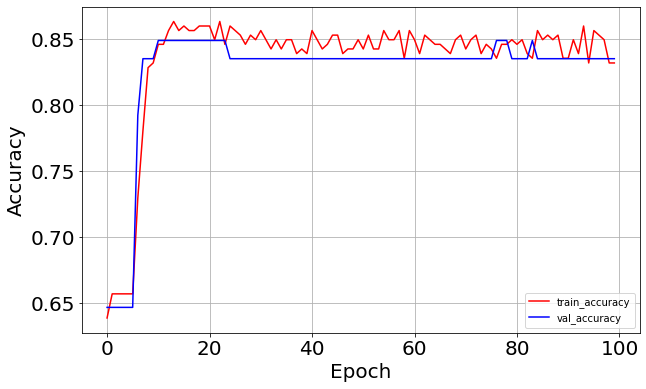

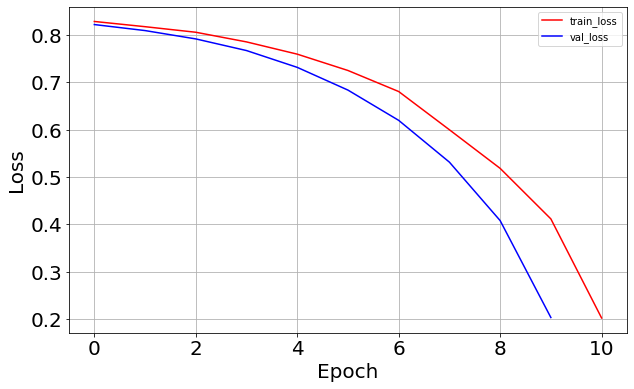

In [75]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(model_tuned.history['accuracy']), 'r', label='train_accuracy')
ax.plot(np.sqrt(model_tuned.history['val_accuracy']), 'b' ,label='val_accuracy')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Accuracy', fontsize=20)
ax.legend()
plt.grid()
ax.tick_params(labelsize=20)

fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(model_tuned.history['loss']), 'r', label='train_loss')
ax.plot(np.sqrt(model_tuned.history['val_loss']), 'b' ,label='val_loss')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
plt.grid()
ax.tick_params(labelsize=20)

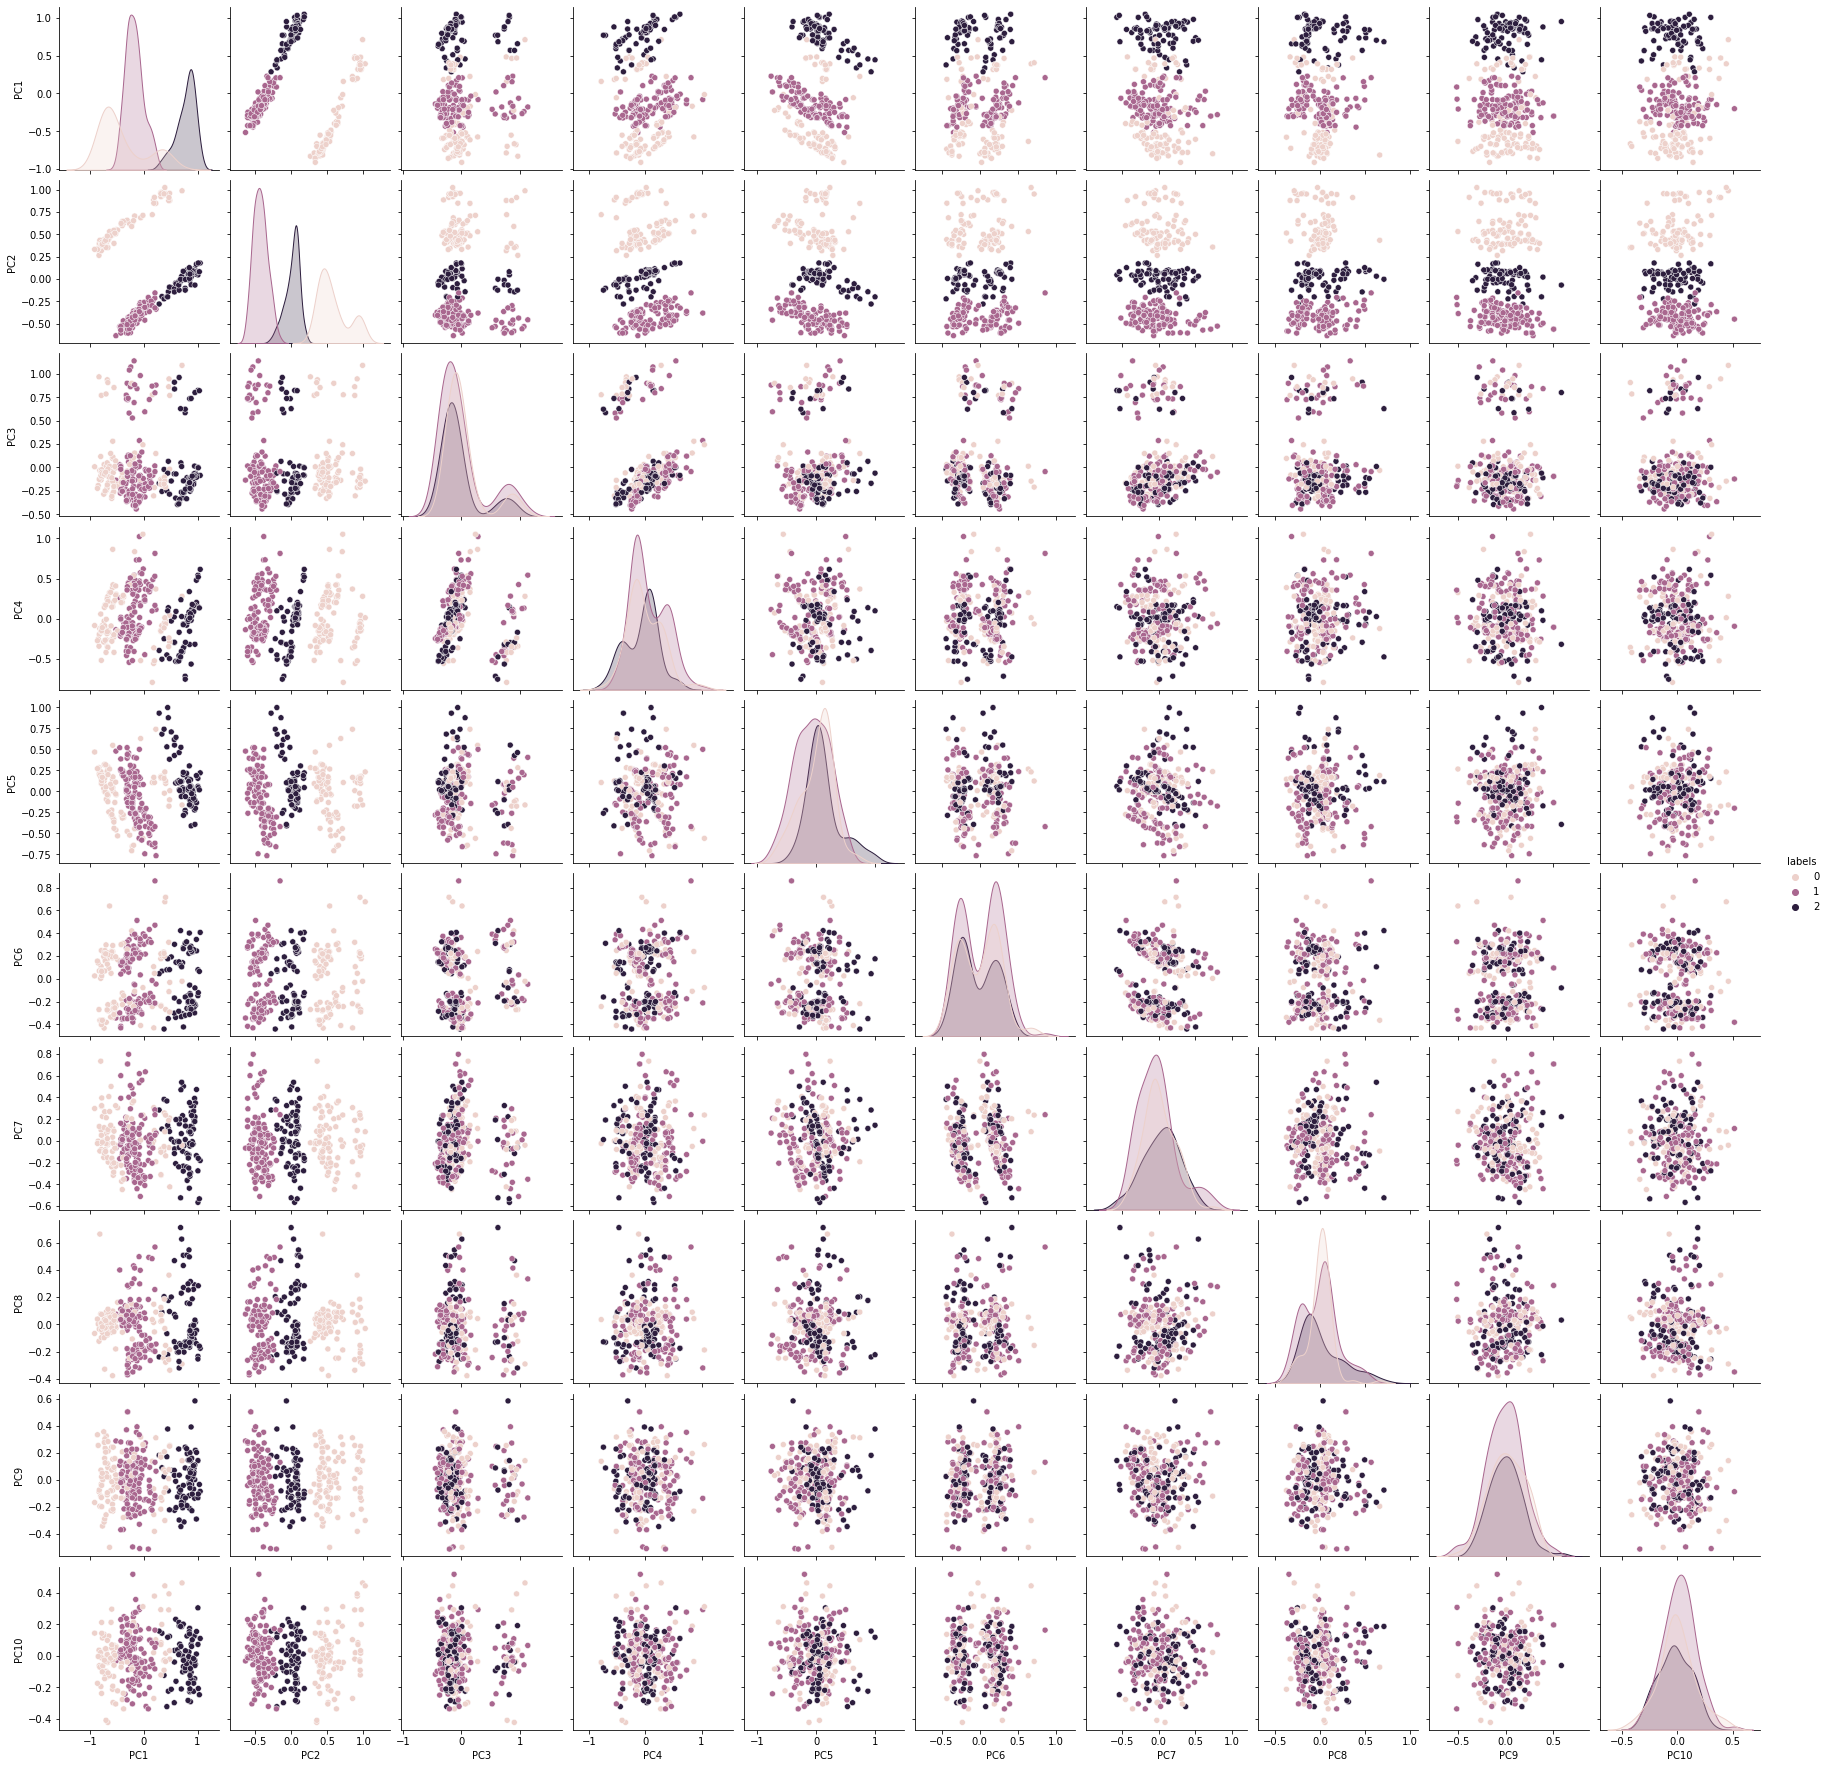

In [76]:
sns.pairplot(dataset, hue = 'labels')
plt.show()